# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# 設定 data_path
dir_data = './Part01/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [13]:
help (pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or pandas.IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
        * sequence of scalars : Defines the bin edges all

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
app_train['DAYS_BIRTH_365']=app_train['DAYS_BIRTH'] /365 

In [7]:
app_train['DAYS_BIRTH_365'].max()

69.12054794520547

In [8]:
spacing = np.linspace(20,70,num = 8,endpoint=True , retstep= False, dtype=None)
app_train['DAYS_BIRTH_365_CutDone'] = pd.cut(app_train['DAYS_BIRTH_365'],bins= spacing)

In [9]:
app_train['DAYS_BIRTH_365_CutDone'].value_counts()

(34.286, 41.429]    60631
(27.143, 34.286]    56956
(41.429, 48.571]    54625
(48.571, 55.714]    49302
(55.714, 62.857]    44799
(20.0, 27.143]      21977
(62.857, 70.0]      19221
Name: DAYS_BIRTH_365_CutDone, dtype: int64

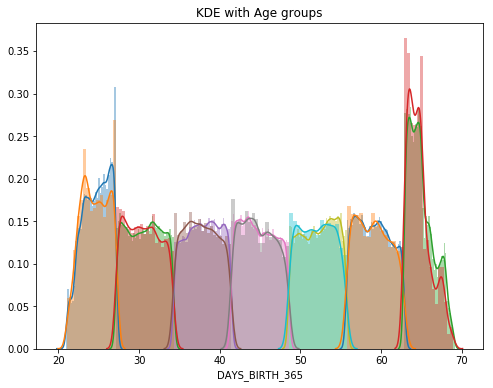

In [38]:
year_group_sorted = np.sort(app_train['DAYS_BIRTH_365_CutDone'].unique())
plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(app_train.loc[(app_train['DAYS_BIRTH_365_CutDone'] == year_group_sorted[i]) & \
                              (app_train['TARGET'] == 0), 'DAYS_BIRTH_365'], label = str(year_group_sorted[i]))
    
    sns.distplot(app_train.loc[(app_train['DAYS_BIRTH_365_CutDone'] == year_group_sorted[i]) & \
                              (app_train['TARGET'] == 1), 'DAYS_BIRTH_365'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [18]:
test_np_sort = np.sort(app_train['DAYS_BIRTH_365_CutDone'])

In [19]:
test_np_sort

array([Interval(20.0, 27.143, closed='right'),
       Interval(20.0, 27.143, closed='right'),
       Interval(20.0, 27.143, closed='right'), ...,
       Interval(62.857, 70.0, closed='right'),
       Interval(62.857, 70.0, closed='right'),
       Interval(62.857, 70.0, closed='right')], dtype=object)

In [21]:
test_dp_sort = app_train['DAYS_BIRTH_365_CutDone'].sort_values()

In [23]:
app_train.sort_values(by= ['DAYS_BIRTH_365_CutDone'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,DAYS_BIRTH_365,DAYS_BIRTH_365_CutDone
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,False,25.920548,"(20.0, 27.143]"
222554,357792,0,1,M,0,1,0,180000.0,135000.0,6750.0,...,1,0.0,0.0,0.0,0.0,0.0,2.0,False,24.446575,"(20.0, 27.143]"
51957,160170,0,0,M,0,1,0,56209.5,540000.0,23310.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,False,22.265753,"(20.0, 27.143]"
222541,357777,0,0,F,0,0,0,135000.0,270000.0,21330.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,False,23.841096,"(20.0, 27.143]"
222532,357768,1,0,M,1,0,0,157500.0,315000.0,24885.0,...,0,0.0,0.0,0.0,1.0,0.0,1.0,False,27.131507,"(20.0, 27.143]"
51964,160183,1,0,M,0,1,0,171000.0,225000.0,24232.5,...,0,0.0,0.0,0.0,0.0,0.0,3.0,False,26.271233,"(20.0, 27.143]"
51967,160186,0,0,F,1,1,1,135000.0,202500.0,13419.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,False,24.890411,"(20.0, 27.143]"
222559,357797,0,0,M,1,1,0,180000.0,450000.0,51025.5,...,0,0.0,0.0,0.0,0.0,2.0,3.0,False,22.358904,"(20.0, 27.143]"
222513,357746,0,0,F,0,1,1,67500.0,301464.0,19395.0,...,0,0.0,0.0,0.0,0.0,0.0,3.0,False,25.032877,"(20.0, 27.143]"
222503,357736,0,0,M,0,0,0,171000.0,507469.5,34042.5,...,0,0.0,0.0,0.0,0.0,1.0,3.0,False,26.580822,"(20.0, 27.143]"
